In [17]:
#### Import Libraries
import os
import glob
import pandas as pd

# Set the correct path for your dataset folder
os.chdir(r"C:\Users\User\Downloads\Pandas-Analytics-Project-main\Pandas-Analytics-Project-main")  # Change to your directory

In [19]:
####Use glob to match the pattern "csv"
mydir = glob.glob("*.csv")  # Get a list of all CSV files in the directory

In [21]:
# Combine the CSV files into one DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in mydir], ignore_index=True)


In [23]:
# Export the combined dataset to a CSV file
combined_data.to_csv("combined_dataset.csv", index=False)

In [ ]:
## Step 2 - Data Exploration

In [25]:
### Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [26]:
# View the first few rows of the combined dataset
combined_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [29]:
####Check the number of rows and columns present in the data using the shape attribute.
combined_data.shape

(8000, 17)

In [31]:
####- Generate the names of the columns using the columns attribute.
import pandas as pd

# Load the combined dataset
combined_data = pd.read_csv(r"C:\Users\User\Downloads\Pandas-Analytics-Project-main\Pandas-Analytics-Project-main\combined_dataset.csv")

# Generate the names of the columns using the columns attribute
column_names = combined_data.columns
print(column_names)

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [33]:
####- Statiscal Summary
# Generate the statistical summary of the dataset
stat_summary = combined_data.describe()

# Display the statistical summary
print(stat_summary)

         Unit price     Quantity        Tax 5%          Total           cogs  \
count   8000.000000  8000.000000   8000.000000    8000.000000    8000.000000   
mean   20041.966800     5.510000   5536.572840  116268.029640  110731.456800   
std     9533.891866     2.922151   4213.332399   88479.980377   84266.647978   
min     3628.800000     1.000000    183.060000    3844.260000    3661.200000   
25%    11835.000000     3.000000   2132.955000   44792.055000   42659.100000   
50%    19882.800000     5.000000   4351.680000   91385.280000   87033.600000   
75%    28056.600000     8.000000   8080.290000  169686.090000  161605.800000   
max    35985.600000    10.000000  17874.000000  375354.000000  357480.000000   

       gross margin percentage  gross income       Rating  
count             8.000000e+03   8000.000000  8000.000000  
mean              4.761905e+00   5536.572840     6.972700  
std               1.225763e-13   4213.332399     1.717828  
min               4.761905e+00    183.0

In [ ]:
####Below this cell write in few sentences what you can derive from the data statistical summary
From the statistical summary of the dataset, we can derive the following insights:

Unit Price:

The average unit price is 20,041.97, with a large standard deviation of 9,533.89, indicating that the unit prices vary widely.
The minimum unit price is 3,628.80, while the maximum unit price is 35,985.60, showing a significant range in prices.
Quantity:

The average quantity sold is about 5.51, with most values between 1 and 10, as indicated by the 25th (3) and 75th (8) percentiles.
This suggests that the majority of transactions involve small quantities.
Tax 5%:

The tax value is directly related to the unit price and quantity. It has a mean of 5,536.57, with a minimum value of 183.06 and a maximum of 17,874.00.
The tax distribution appears to have significant variance, which could be influenced by the unit prices and quantities.
Total:

The total value, which likely includes the tax, has a mean of 116,268.03. The total range varies from 3,844.26 to 375,354.00.
The relatively high standard deviation suggests large differences in the total amounts across the dataset.
COGS (Cost of Goods Sold):

The cost of goods sold (COGS) has a mean of 110,731.46, with a minimum value of 3,661.20 and a maximum of 357,480.00.
The data indicates that COGS generally follows a similar pattern to the total value, with a high correlation.
Gross Margin Percentage:

The gross margin percentage is constant at 4.76%, indicating that it does not vary across the dataset. This suggests a fixed margin applied across all sales.
Gross Income:

Gross income has the same distribution as the tax and COGS columns, with an average of 5,536.57. This aligns with the gross margin percentage since gross income likely depends on the sales volume.
Rating:

The average rating is around 6.97, with a range from 4 to 10. The ratings are clustered between 5 and 9, with most entries having ratings in this range.
The relatively small standard deviation (1.72) suggests that ratings do not vary drastically, indicating a generally positive perception.

In [35]:
#### - Missing values
# Check for missing data using isnull() method
missing_data = combined_data.isnull().sum()

# Check for non-missing data using notna() method
non_missing_data = combined_data.notna().sum()

# Print out the missing data summary
print("Missing Data Count for Each Column:")
print(missing_data)

# Print out the non-missing data summary
print("\nNon-Missing Data Count for Each Column:")
print(non_missing_data)



Missing Data Count for Each Column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Non-Missing Data Count for Each Column:
Invoice ID                 8000
Branch                     8000
City                       8000
Customer type              8000
Gender                     8000
Product line               8000
Unit price                 8000
Quantity                   8000
Tax 5%                     8000
Total                      8000
Date                       8000
Time                       8000
Payment                    8000
c

In [37]:
####- Data Information
# Display a concise summary of the dataset
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               8000 non-null   object 
 1   Branch                   8000 non-null   object 
 2   City                     8000 non-null   object 
 3   Customer type            8000 non-null   object 
 4   Gender                   8000 non-null   object 
 5   Product line             8000 non-null   object 
 6   Unit price               8000 non-null   float64
 7   Quantity                 8000 non-null   int64  
 8   Tax 5%                   8000 non-null   float64
 9   Total                    8000 non-null   float64
 10  Date                     8000 non-null   object 
 11  Time                     8000 non-null   object 
 12  Payment                  8000 non-null   object 
 13  cogs                     8000 non-null   float64
 14  gross margin percentage 

In [ ]:
####DEALING WITH TIME FRAME

In [47]:
#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`
combined_data.columns
# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'])



In [45]:
# Check the datatype of the 'Date' column
combined_data['Date'].dtype

dtype('<M8[ns]')

In [55]:
# Convert the 'Time' column to datetime format without seconds
combined_data['Time'] = pd.to_datetime(combined_data['Time'], format='%H:%M').dt.time


In [ ]:
## Extract Features from date & time

In [57]:
# Extract the day from the 'Date' column and save it to a new 'Day' column
combined_data['Day'] = combined_data['Date'].dt.day

In [59]:
# Extract the month from the 'Date' column and save it to a new 'Month' column
combined_data['Month'] = combined_data['Date'].dt.month

In [61]:
# Extract the year from the 'Date' column and save it to a new 'Year' column
combined_data['Year'] = combined_data['Date'].dt.year


In [67]:
# Convert 'Time' to datetime, including seconds
combined_data['Time'] = pd.to_datetime(combined_data['Time'], format='%H:%M:%S')

# Extract the hour from 'Time' and save it to a new 'Hour' column
combined_data['Hour'] = combined_data['Time'].dt.hour


In [69]:
# Determine the unique hours of sales
unique_hours = combined_data['Hour'].unique()

# Display the unique hours
print(unique_hours)


[13 18 17 16 15 10 12 19 14 11 20]


In [71]:
# Get unique values from the 'City' column
unique_cities = combined_data['City'].unique()
print("Unique cities:", unique_cities)

# Get unique values from the 'Product line' column
unique_product_lines = combined_data['Product line'].unique()
print("Unique product lines:", unique_product_lines)

# Get unique values from the 'Payment' column
unique_payments = combined_data['Payment'].unique()
print("Unique payment methods:", unique_payments)

# You can repeat the above for other columns as needed


Unique cities: ['Abuja' 'Lagos' 'Port Harcourt']
Unique product lines: ['Food and beverages' 'Fashion accessories' 'Electronic accessories'
 'Sports and travel' 'Home and lifestyle' 'Health and beauty']
Unique payment methods: ['Card' 'Epay' 'Cash']


In [73]:
# Count the unique values for the 'City' column
city_counts = combined_data['City'].value_counts()
print("City counts:\n", city_counts)

# Count the unique values for the 'Product line' column
product_line_counts = combined_data['Product line'].value_counts()
print("Product line counts:\n", product_line_counts)

# Count the unique values for the 'Payment' column
payment_counts = combined_data['Payment'].value_counts()
print("Payment counts:\n", payment_counts)

# You can repeat the above for other categorical columns as needed


City counts:
 City
Lagos            2720
Abuja            2656
Port Harcourt    2624
Name: count, dtype: int64
Product line counts:
 Product line
Fashion accessories       1424
Food and beverages        1392
Electronic accessories    1360
Sports and travel         1328
Home and lifestyle        1280
Health and beauty         1216
Name: count, dtype: int64
Payment counts:
 Payment
Epay    2760
Cash    2752
Card    2488
Name: count, dtype: int64


In [ ]:
## Step 5 - Aggregration with GroupBy

In [75]:
# Group by 'City' and aggregate using sum and mean
city_grouped = combined_data.groupby('City').agg(
    sum_total=('Total', 'sum'),
    mean_total=('Total', 'mean'),
    sum_quantity=('Quantity', 'sum'),
    mean_quantity=('Quantity', 'mean'),
    sum_cogs=('cogs', 'sum'),
    mean_cogs=('cogs', 'mean'),
    sum_gross_income=('gross income', 'sum'),
    mean_gross_income=('gross income', 'mean')
)

# Display the grouped data
print(city_grouped)


                  sum_total     mean_total  sum_quantity  mean_quantity  \
City                                                                      
Abuja          3.058493e+08  115154.102169         14560       5.481928   
Lagos          3.058571e+08  112447.451118         14872       5.467647   
Port Harcourt  3.184379e+08  121355.897378         14648       5.582317   

                  sum_cogs      mean_cogs  sum_gross_income  mean_gross_income  
City                                                                            
Abuja          291285043.2  109670.573494       14564252.16        5483.528675  
Lagos          291292444.8  107092.810588       14564622.24        5354.640529  
Port Harcourt  303274166.4  115577.045122       15163708.32        5778.852256  


In [77]:
# Group by 'City' and aggregate the sum of 'gross income'
city_gross_income = combined_data.groupby('City')['gross income'].sum().reset_index()

# Sort the cities by total gross income in descending order to find the city with the highest gross income
city_gross_income_sorted = city_gross_income.sort_values(by='gross income', ascending=False)

# Display the sorted table
print(city_gross_income_sorted)

# Determine the city with the highest total gross income
highest_gross_income_city = city_gross_income_sorted.iloc[0]
print(f"The city with the highest total gross income is {highest_gross_income_city['City']} with a gross income of {highest_gross_income_city['gross income']}.")


            City  gross income
2  Port Harcourt   15163708.32
1          Lagos   14564622.24
0          Abuja   14564252.16
The city with the highest total gross income is Port Harcourt with a gross income of 15163708.32.


In [ ]:
## Step 6 - Data Visualization

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# Set Seaborn style for better visualizations
sns.set(style="whitegrid")


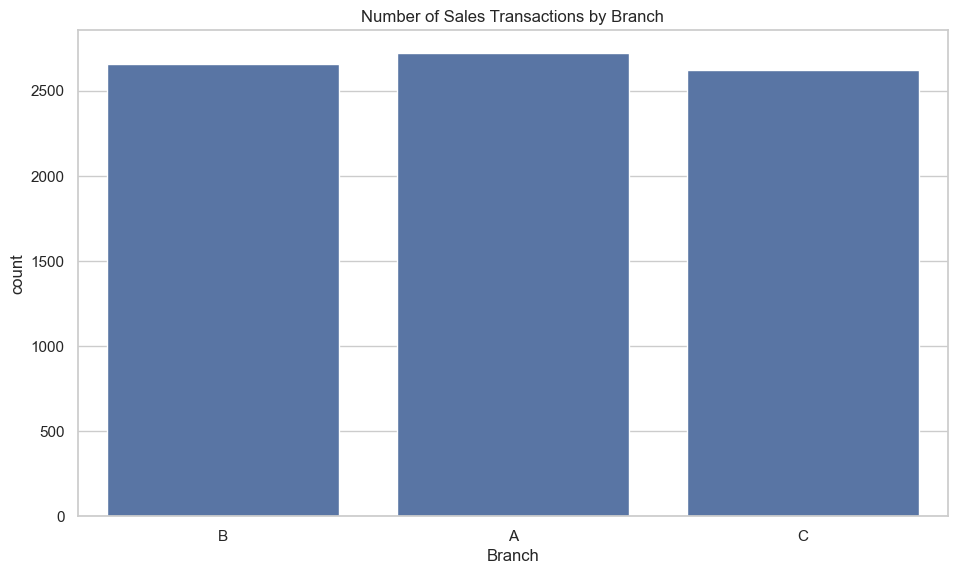

In [83]:
# Create the countplot for Branches
plt.figure(figsize=(10, 6))
sns.countplot(x='Branch', data=combined_data)
plt.title('Number of Sales Transactions by Branch')  # Set chart title
plt.show()


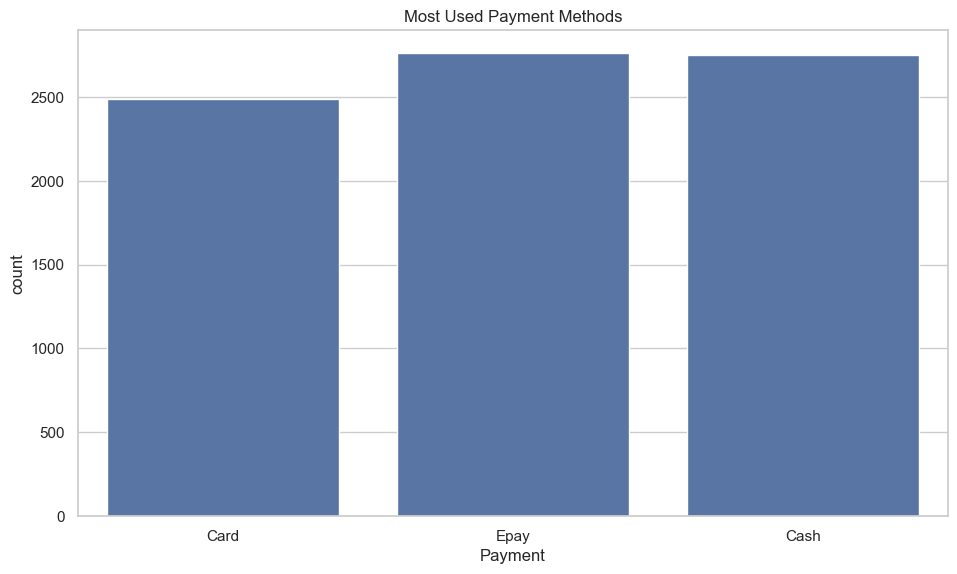

In [85]:
# Create the countplot for Payment Methods
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=combined_data)
plt.title('Most Used Payment Methods')  # Set chart title
plt.show()


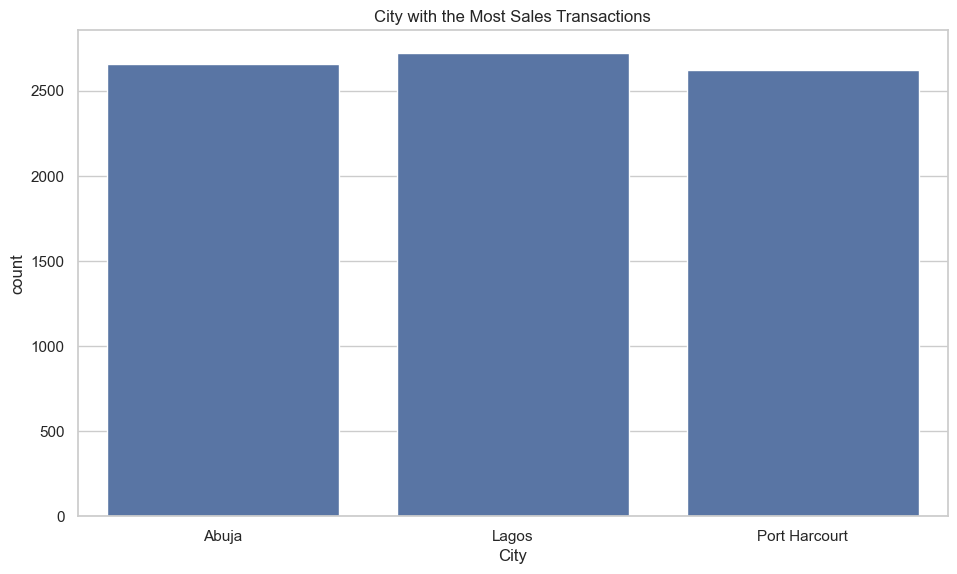

In [87]:
# Create the countplot for Cities
plt.figure(figsize=(10, 6))
sns.countplot(x='City', data=combined_data)
plt.title('City with the Most Sales Transactions')  # Set chart title
plt.show()


In [ ]:
#### Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


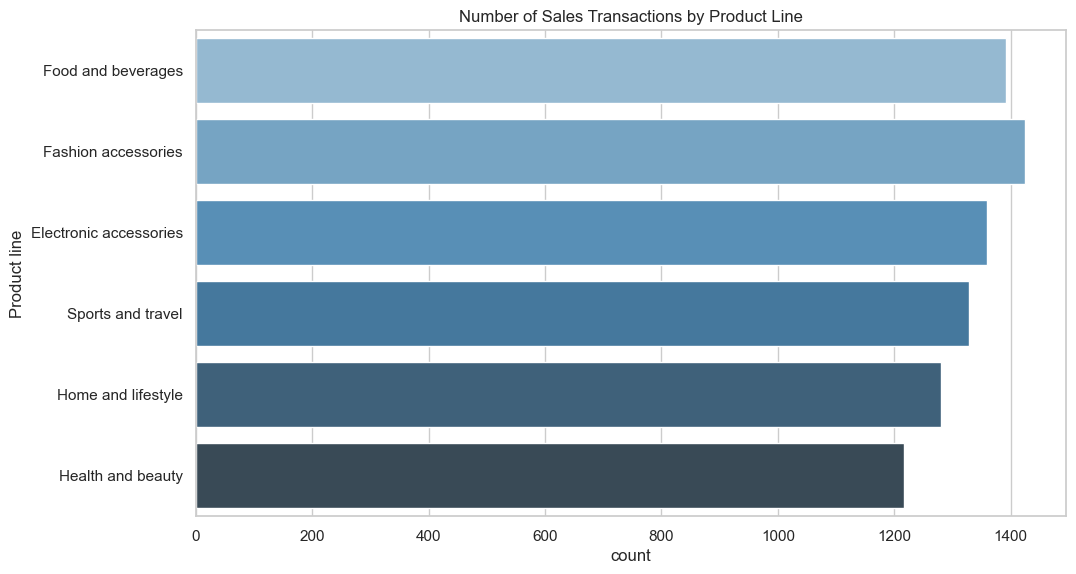

In [91]:
# Create the countplot for Product lines with custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(y='Product line', data=combined_data, palette='Blues_d')  # Custom color palette
plt.title('Number of Sales Transactions by Product Line')  # Set chart title
plt.show()


In [93]:
# Calculate the sales count per product line
product_line_sales = combined_data['Product line'].value_counts()

# Get the highest and lowest sold product lines
highest_sold = product_line_sales.idxmax()
lowest_sold = product_line_sales.idxmin()

print(f"Highest sold product line: {highest_sold}")
print(f"Lowest sold product line: {lowest_sold}")


Highest sold product line: Fashion accessories
Lowest sold product line: Health and beauty


In [95]:
####-  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column.
import seaborn as sns
import matplotlib.pyplot as plt


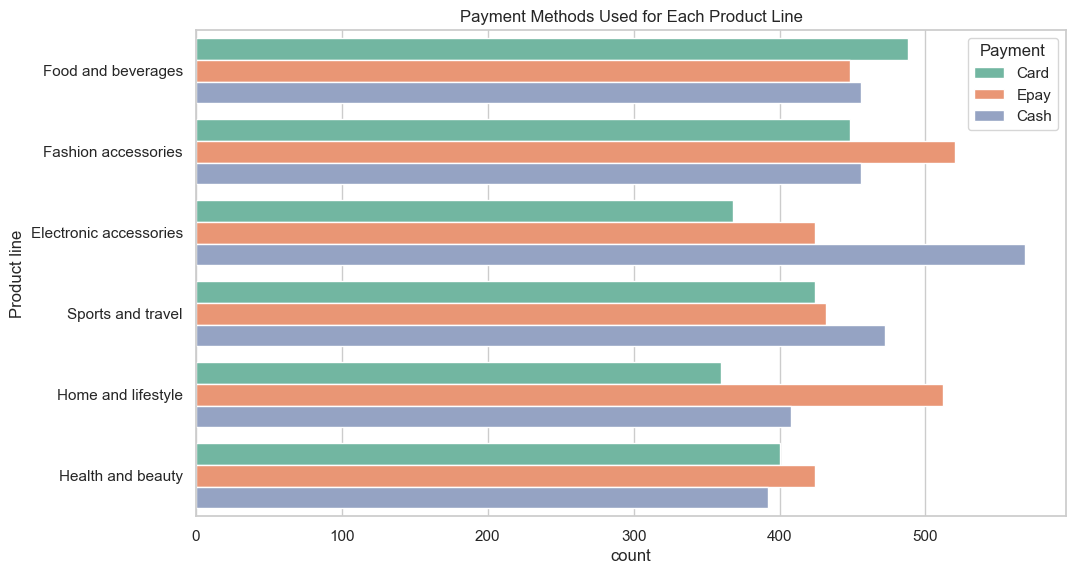

In [97]:
# Create the countplot with 'Product line' on the y-axis and 'Payment' as the hue
plt.figure(figsize=(10, 6))
sns.countplot(y='Product line', data=combined_data, hue='Payment', palette='Set2')  # Custom color palette
plt.title('Payment Methods Used for Each Product Line')  # Set chart title
plt.show()


In [ ]:
###By inspecting this plot, you can visually determine which payment channel is used the most for each product line. The hue will allow you to see the distribution of payment methods for each product line.

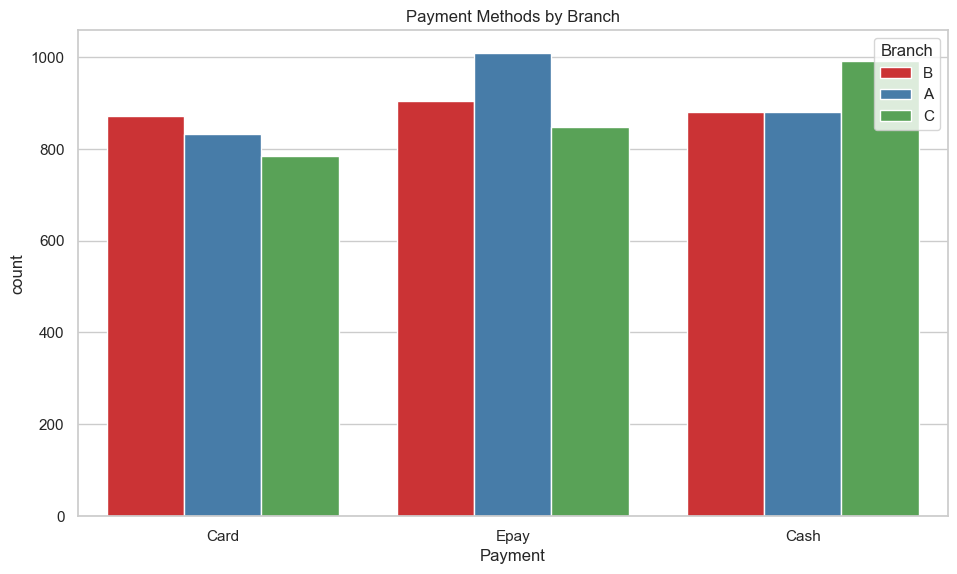

In [99]:
# Create the countplot with 'Payment' on the x-axis and 'Branch' as the hue
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=combined_data, hue='Branch', palette='Set1')  # Custom color palette
plt.title('Payment Methods by Branch')  # Set chart title
plt.show()

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt


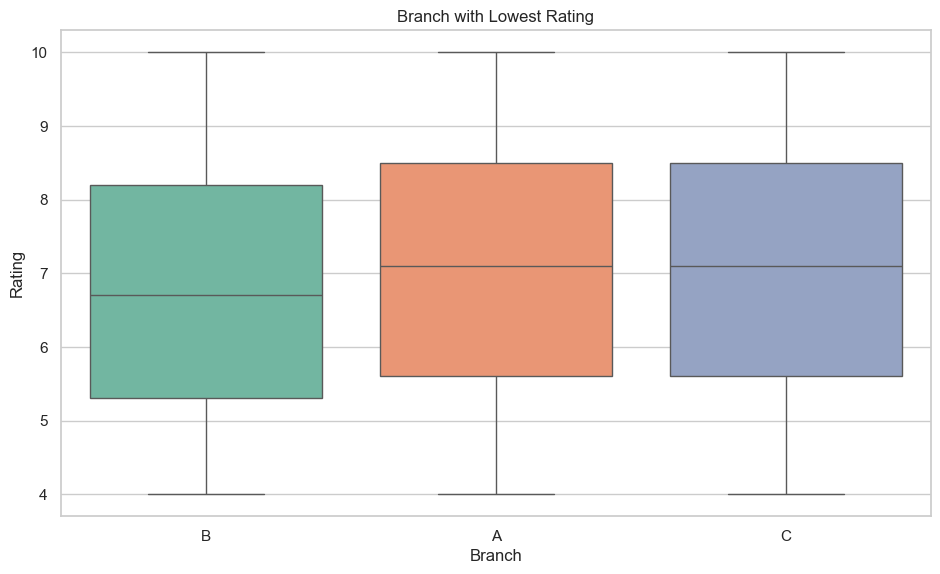

In [103]:
# Create a box plot to visualize the distribution of ratings by branch
plt.figure(figsize=(10, 6))
sns.boxplot(x='Branch', y='Rating', data=combined_data, palette='Set2')  # Custom color palette
plt.title('Branch with Lowest Rating')  # Set chart title
plt.show()


In [ ]:
###The box plot will show the distribution of ratings for each branch.
The branch with the lowest rating will typically have the lowest median and might show an outlier if there is a significant negative rating.
You can observe the range of ratings (min, max, and quartiles) for each branch and easily spot the one with the lowest ratings.

<Figure size 1200x600 with 0 Axes>

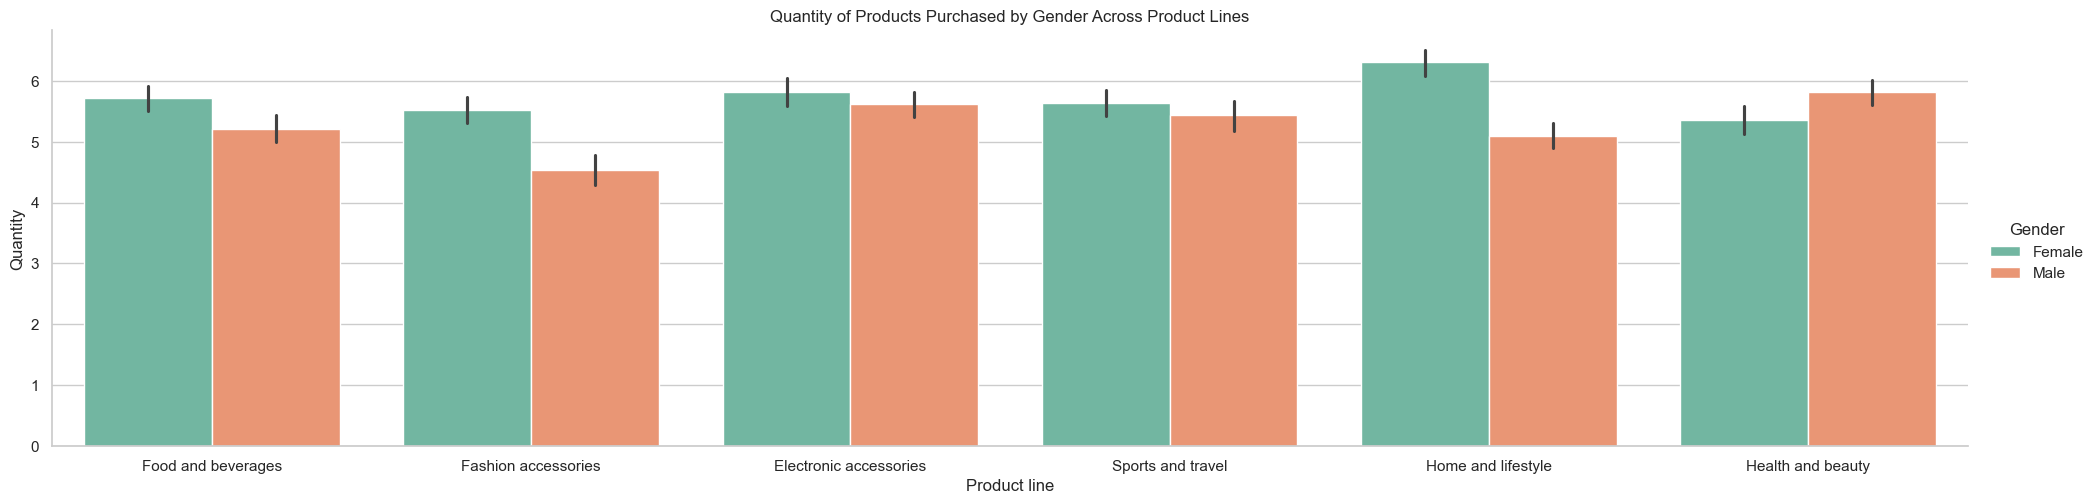

In [105]:
####- The gender type often affects the kind of products being purchased at the supermarket.
# Visualize the relationship between Product Line, Quantity, and Gender
plt.figure(figsize=(12, 6))
sns.catplot(x='Product line', y='Quantity', hue='Gender', data=combined_data, kind='bar', aspect=4, palette='Set2')
plt.title('Quantity of Products Purchased by Gender Across Product Lines')
plt.show()

<Figure size 1200x600 with 0 Axes>

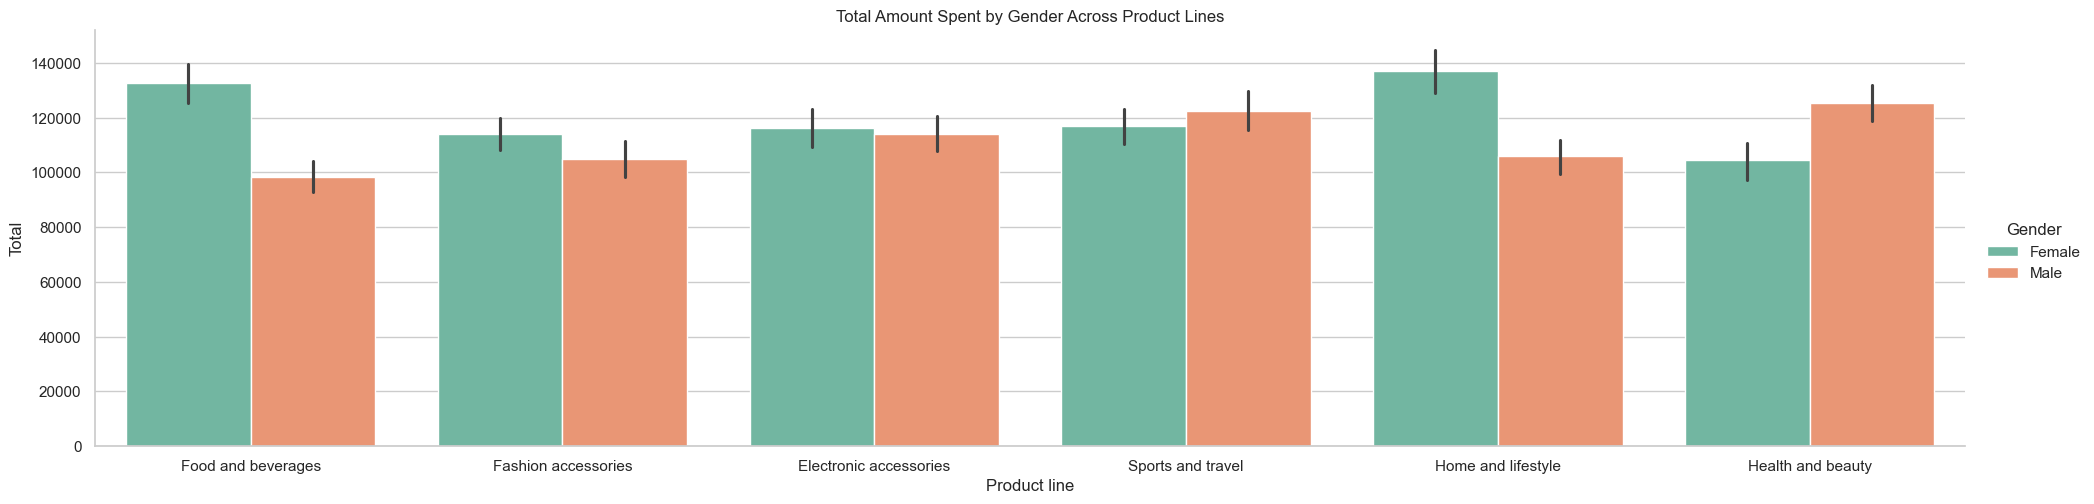

In [107]:
# Visualize the relationship between Product Line, Total, and Gender
plt.figure(figsize=(12, 6))
sns.catplot(x='Product line', y='Total', hue='Gender', data=combined_data, kind='bar', aspect=4, palette='Set2')
plt.title('Total Amount Spent by Gender Across Product Lines')
plt.show()

In [ ]:
####Summary of Insights:
Quantity Purchased by Gender:
The chart will show how different genders purchase various quantities across product lines.
It might reveal trends such as whether one gender is more likely to buy certain product types in larger quantities, such as beauty products or grocery items.
Total Amount Spent by Gender:
The second chart highlights the total amount spent by gender across product lines.
You may notice if one gender tends to spend more on specific product lines. For instance, one gender might be spending more on 'Health and Beauty' products, while another spends more on 'Food and Beverages'.
Comparing Quantities and Totals:
Differences in gender spending and quantity patterns can also be observed. For example, if one gender is purchasing larger quantities but not necessarily spending more, it may indicate that they prefer lower-cost products.
If a specific product line shows higher spending for one gender, this might be used for targeted marketing or inventory management.

<Figure size 1200x600 with 0 Axes>

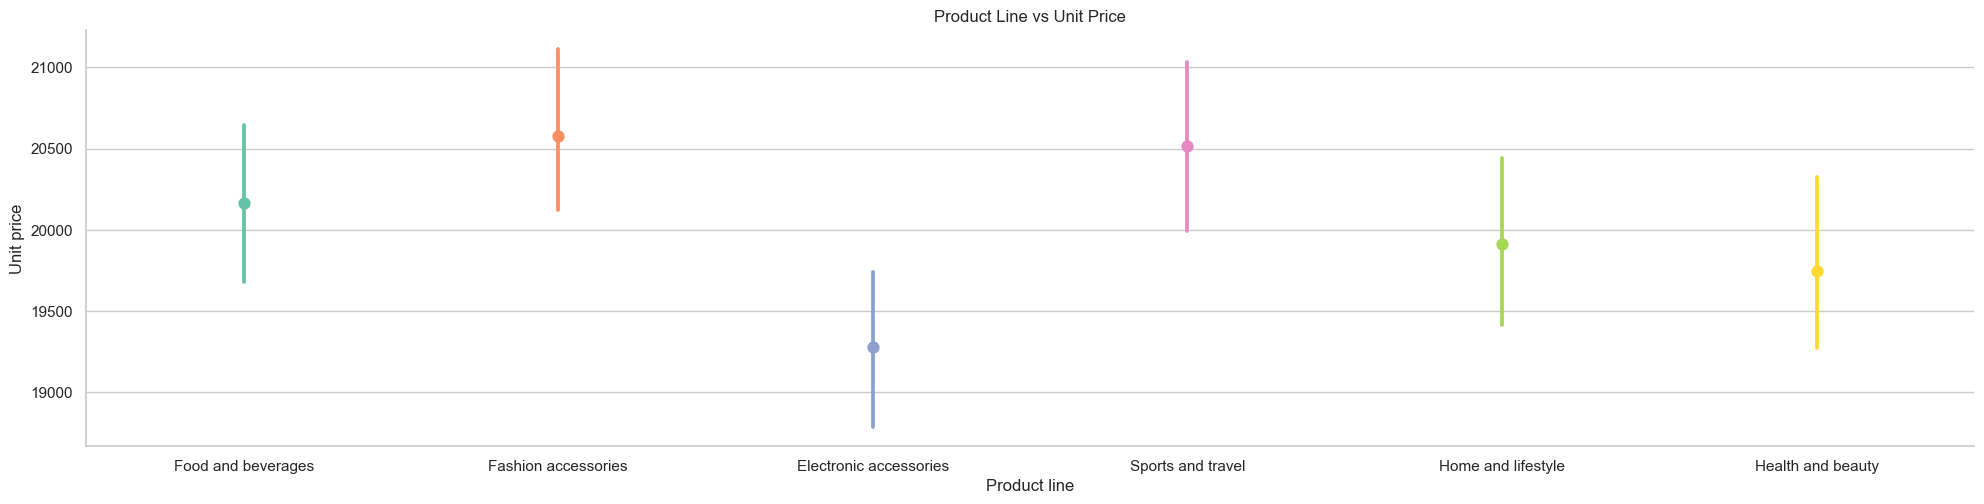

In [109]:
# Visualize Product Line vs Unit Price using catplot
plt.figure(figsize=(12, 6))
sns.catplot(x='Product line', y='Unit price', data=combined_data, kind='point', aspect=4, palette='Set2')
plt.title('Product Line vs Unit Price')
plt.show()

<Figure size 1200x600 with 0 Axes>

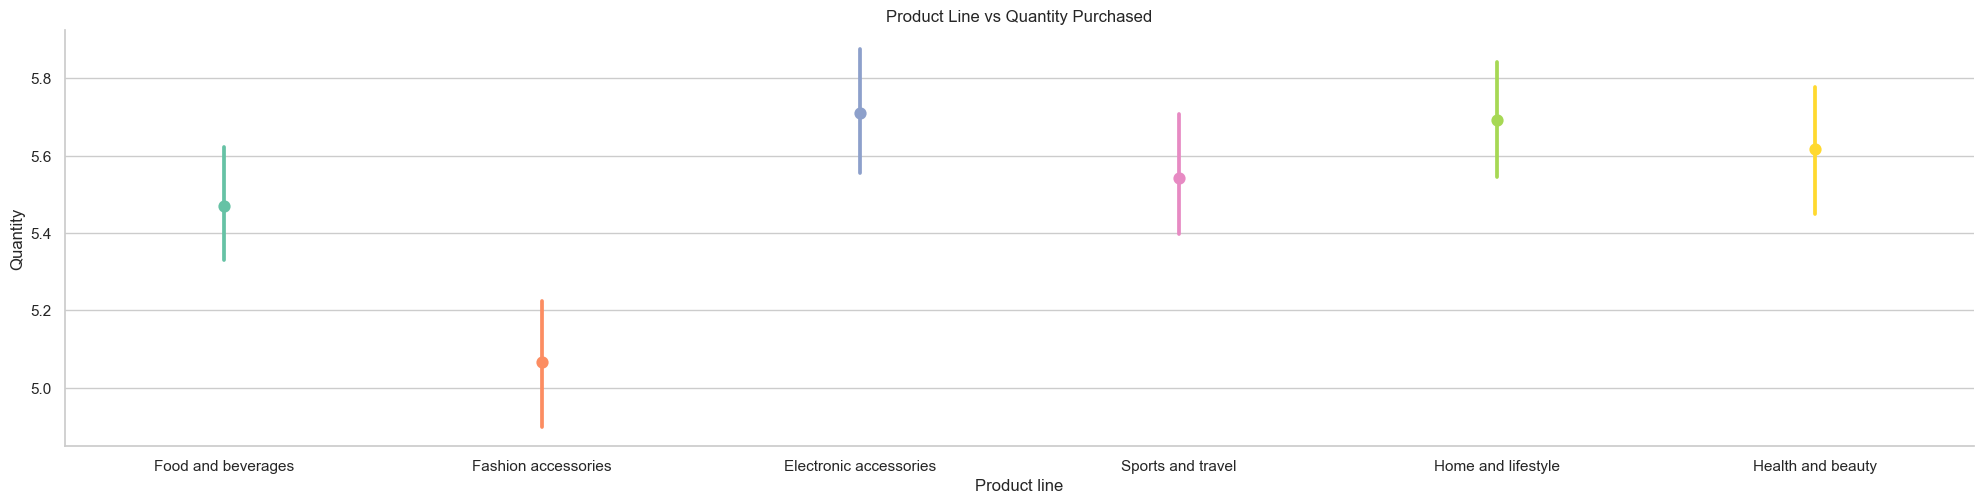

In [111]:
# Visualize Product Line vs Quantity using catplot
plt.figure(figsize=(12, 6))
sns.catplot(x='Product line', y='Quantity', data=combined_data, kind='point', aspect=4, palette='Set2')
plt.title('Product Line vs Quantity Purchased')
plt.show()

In [ ]:
####Summary of Insights:
Product Line vs Unit Price:

###The plot shows how the unit price varies across different product lines.
Product lines like 'Health and Beauty' or 'Electronic accessories' may show higher average unit prices, while more essential product lines like 'Food and Beverages' or 'Household' may feature lower unit prices.
This can provide insight into how the supermarket prices its various products based on category and demand.
Product Line vs Quantity Purchased:

###This plot reveals how the quantity purchased varies across different product lines.
Some product lines (such as 'Food and Beverages') may have higher quantities purchased compared to more expensive product lines (like 'Electronic accessories'), which may result in lower quantities purchased due to their higher cost.
The quantity purchased also reflects purchasing patterns. A higher quantity of a product may indicate consumer preference or promotions around those items.
Interaction Between Unit Price and Quantity:

####By comparing these two visualizations, we can observe if there's any inverse relationship between unit price and quantity purchased. For example, products with lower unit prices tend to have higher quantities purchased.
The supermarket could use this information for pricing strategies: lowering prices of higher-priced items to potentially increase sales volume, or optimizing the pricing of products to balance profitability and sales volume.
In summary, the interaction between unit price and quantity helps identify product lines that are more price-sensitive and those that command higher value but are purchased less frequently. This can guide pricing, marketing, and sales strategies.








In [11]:
import os
import pandas as pd

# Set the directory containing CSV files
directory = r"C:\Users\User\Downloads\Pandas-Analytics-Project-main\Pandas-Analytics-Project-main"

# List all CSV files in the directory
csv_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.endswith('.csv')]

# Combine all CSV files into one DataFrame
combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

# Display the first few rows of the combined data
print(combined_data.head())

# Verify the columns
print(combined_data.columns)


    Invoice ID Branch   City Customer type  Gender            Product line  \
0  692-92-5582      B  Abuja        Member  Female      Food and beverages   
1  351-62-0822      B  Abuja        Member  Female     Fashion accessories   
2  529-56-3974      B  Abuja        Member    Male  Electronic accessories   
3  299-46-1805      B  Abuja        Member  Female       Sports and travel   
4  319-50-3348      B  Abuja        Normal  Female      Home and lifestyle   

   Unit price  Quantity    Tax 5%      Total       Date   Time Payment  \
0     19742.4         3   2961.36   62188.56  2/20/2019  13:27    Card   
1      5212.8         4   1042.56   21893.76   2/6/2019  18:07    Epay   
2      9183.6         4   1836.72   38571.12   3/9/2019  17:03    Cash   
3     33739.2         6  10121.76  212556.96  1/15/2019  16:19    Cash   
4     14508.0         2   1450.80   30466.80  3/11/2019  15:30    Epay   

       cogs  gross margin percentage  gross income  Rating  
0   59227.2              

In [ ]:
####STEP 7

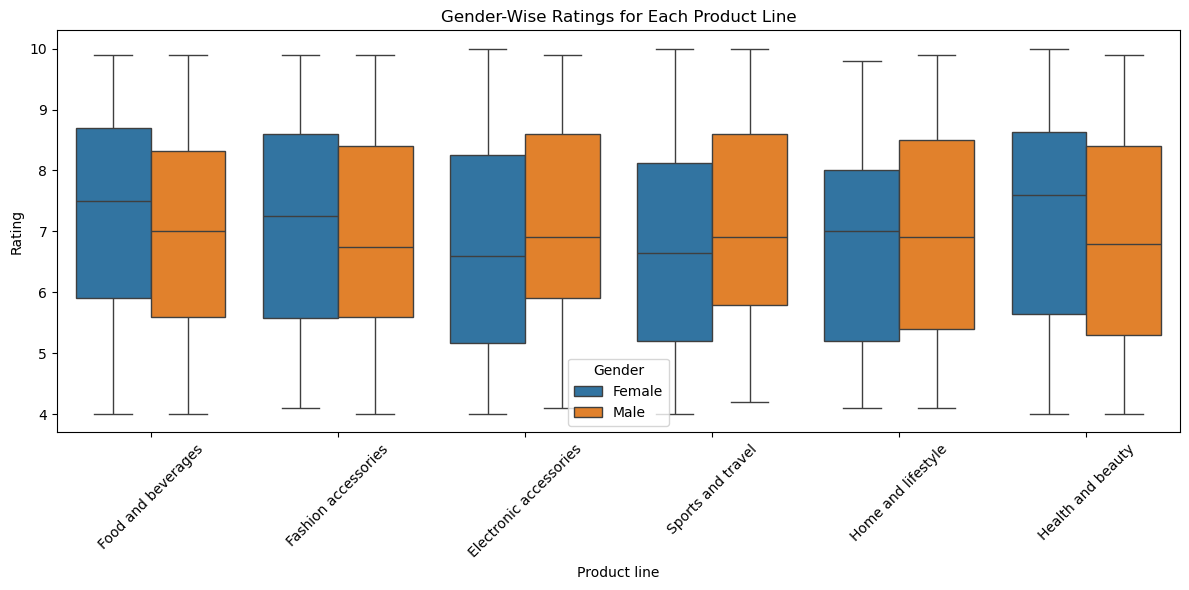

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare ratings by gender for each product line
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='Product line', y='Rating', hue='Gender')
plt.title("Gender-Wise Ratings for Each Product Line")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
